# `Adult Income Dataset`

# `Imports`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn import metrics
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

from mlxtend.plotting import plot_decision_regions

# `Dataset`

##### `Adult Income Dataset`
https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

In [3]:
df = pd.read_csv(r'adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
pd.DataFrame(df.isin(['?']).sum()).T

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0


In [6]:
df['workclass'] = df['workclass'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)
df['native-country'] = df['native-country'].replace('?', np.nan)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
df.dropna(inplace=True)
df.shape

(45222, 15)

In [8]:
df.duplicated().sum()

47

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(45175, 15)

In [10]:
df = df.drop(['educational-num', 'capital-gain', 'capital-loss'], axis=1)
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


In [11]:
X = df.drop(['income'], axis=1)
y = df['income']

In [12]:
X = df.drop(['income'], axis=1)
y = df['income']

categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X.shape, y.shape

((45175, 11), (45175,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train.shape, X_valid.shape, X_test.shape

((32526, 11), (3614, 11), (9035, 11))

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [15]:
knn = KNeighborsClassifier(n_neighbors=180)
knn.fit(X_train, y_train)

print(knn.score(X_train, y_train))
print(knn.score(X_valid, y_valid))
# print(knn.score(X_test, y_test))

0.8036955051343541
0.7971776425013835


In [16]:
k = 8

train_acc, valid_acc, test_acc = [], [], []

for ki in range(1, k+1):
    knn = KNeighborsClassifier(n_neighbors=ki)
    knn.fit(X_train, y_train)

    train_acc.append(knn.score(X_train, y_train))
    valid_acc.append(knn.score(X_valid, y_valid))

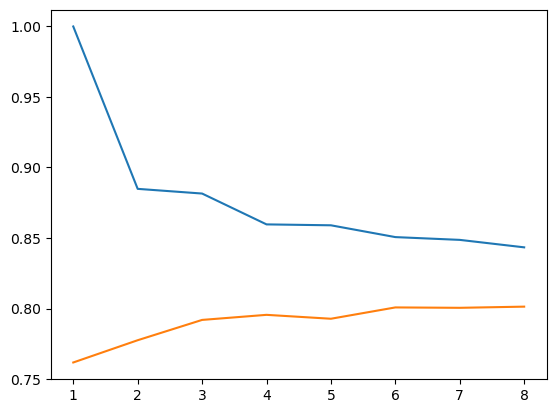

In [17]:
plt.plot(range(1, k+1), train_acc)
plt.plot(range(1, k+1), valid_acc)

In [18]:
knn.score(X_test, y_test)

0.8099612617598229

## `Grid Search CV`

In [19]:
knn = KNeighborsClassifier()
params = {'n_neighbors': range(7, 16)}

knn_grid = GridSearchCV(estimator=knn, param_grid=params, scoring='accuracy', )
knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(7, 16)}, scoring='accuracy')

In [20]:
knn_grid.best_params_

{'n_neighbors': 15}

In [21]:
print(knn_grid.best_estimator_.score(X_train, y_train))
print(knn_grid.best_estimator_.score(X_valid, y_valid))

0.83142716595954
0.8054786939679026


In [22]:
knn = KNeighborsClassifier(algorithm='ball_tree')
params = {'n_neighbors': range(15, 23)}

knn_grid = GridSearchCV(estimator=knn, param_grid=params, scoring='accuracy', )
knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(algorithm='ball_tree'),
             param_grid={'n_neighbors': range(15, 23)}, scoring='accuracy')

In [23]:
knn_grid.best_params_

{'n_neighbors': 16}

In [24]:
print(knn_grid.best_estimator_.score(X_train, y_train))
print(knn_grid.best_estimator_.score(X_valid, y_valid))

0.8305355715427658
0.8038184836745987


In [30]:
print(knn_grid.best_estimator_.score(X_test, y_test))

0.8074156059767571


# `Dataset...`

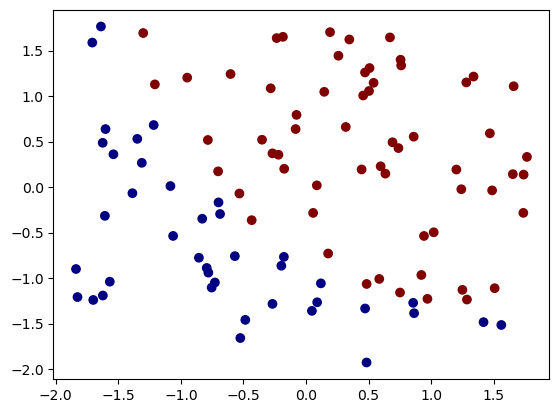

In [31]:
data = np.loadtxt(r'ex2data1.txt', delimiter=',')

X = data[:, :-1].copy()
y = data[:, -1].copy().astype(np.int64)

normz = StandardScaler()
X = normz.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

In [26]:
X.shape, y.shape

((100, 2), (100,))

In [27]:
knn_ = KNeighborsClassifier(n_neighbors=9, )
knn_.fit(X, y)

KNeighborsClassifier(n_neighbors=9)

### `Evaluation`

In [28]:
knn_.predict(X)
knn_.predict_proba(X)
knn_.score(X, y)

0.94

<Axes: >

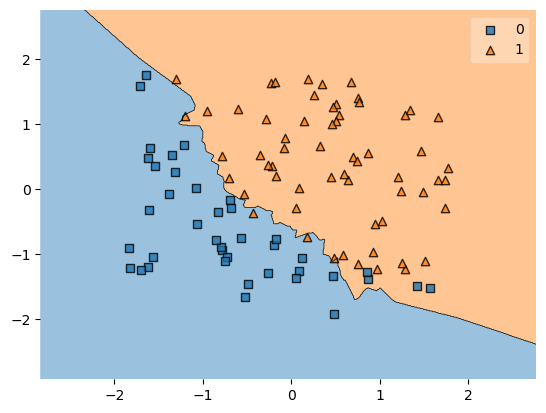

In [29]:
plot_decision_regions(X, y, knn_)

#####  `END`